# Misc Plots

This script is used to create a few figures for the presentation.

In [6]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

from Random import *
from Graph import *

In [7]:
random = Random(
    "../../_random_presets/random_preset_3.b",
    "../../_graph_presets/sparse_100.b",
    ""
)

graph, pos = random.graph, random.pos
# pos = nx.spring_layout(graph)

In [ ]:
G = Graph(None, random)
G.create_random()

G.decompose(method = "matcha")
G.compute_probabilities(method = "random", comm_budget=0.25)
random_probabilities = G.probabilities
G.compute_probabilities(method = "matcha", comm_budget=0.25) 
matcha_probabilities = G.probabilities

In [9]:
print([len(s) for s in G.subgraphs])
print(random_probabilities)
print(matcha_probabilities)

[45, 46, 41, 36, 22, 9, 1]
(0.39331336633571523, 0.37854062313845427, 0.009856309953938446, 0.1303951947770899, 0.4298917347931653, 0.3865999168116332, 0.02140285419000389)
(0.41769273137779517, 0.3698024577240595, 0.29663506179090704, 0.3692884067353294, 0.17451129867392276, 0.12207004369798595, 4.576508698460579e-17)


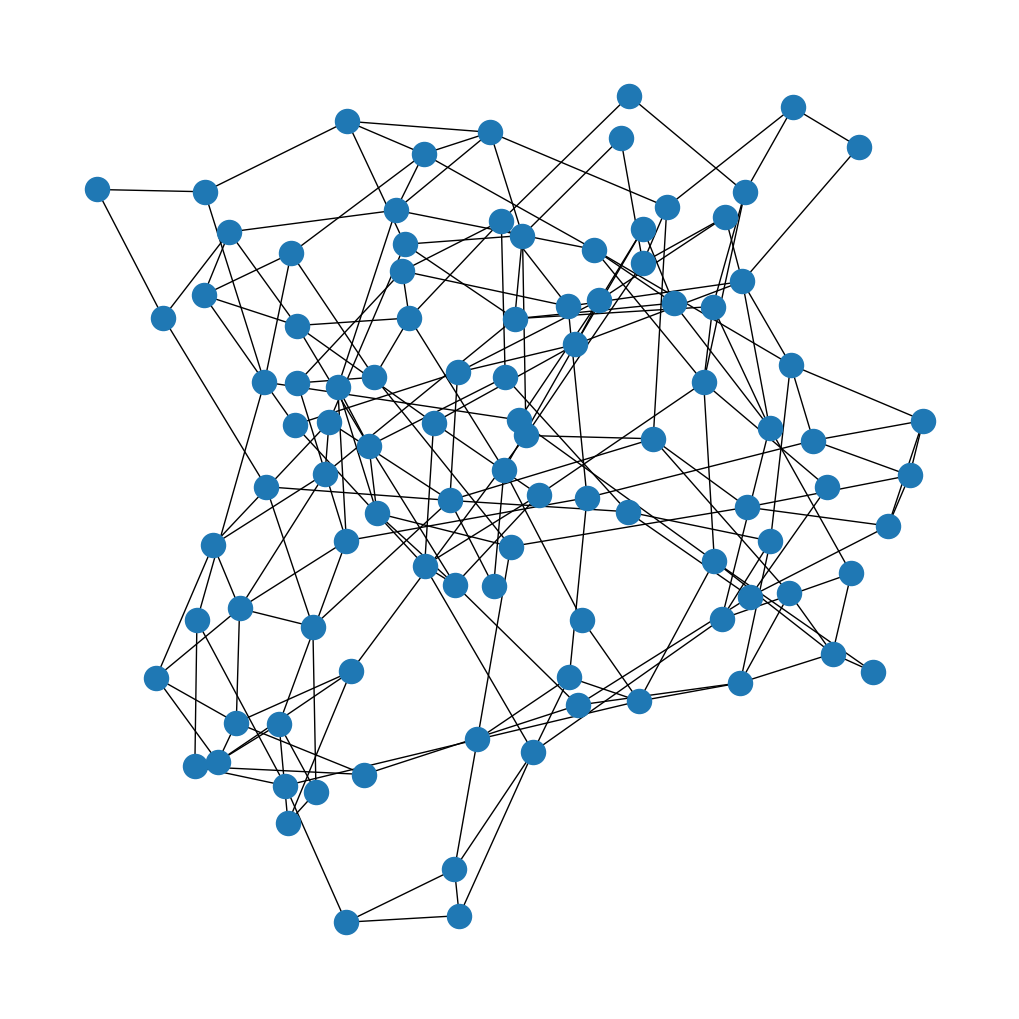

In [10]:
plt.figure(figsize=(10, 10))

both_labels = {
    e: "%.2f | %.2f" % (r, p)
    for (s, r, p) in zip(G.subgraphs, random_probabilities, matcha_probabilities)
    for e in s
}

matcha_labels = {
    e: "%.2f" %  p
    for (s, r, p) in zip(G.subgraphs, random_probabilities, matcha_probabilities)
    for e in s
}

nx.draw(G.G, pos, with_labels = False)

'''
nx.draw_networkx_edge_labels(
    G.G, pos,
    edge_labels = both_labels,
    font_color='red',
    font_size=12
)
'''

plt.show()